# Testes Zuul (docker local)

Resultados de execução dos testes utilizando JMeter no ambiente de testes local de zuul, eureka e api rodando em containers docker.

Configurações:

container | RAM (GB) | CPUs | IP 
----------|----------|------|----
eureka    |  3       |  1   | 172.17.0.2:8761
zuul      |  3       |  1   | 172.17.0.5:8086
myservice |  3       |  1   | 172.17.0.3:8081
myservice |  3       |  1   | 172.17.0.4:8081

Java: 

```
openjdk version "10.0.2" 2018-07-17
OpenJDK Runtime Environment (build 10.0.2+13-Debian-2)
OpenJDK 64-Bit Server VM (build 10.0.2+13-Debian-2, mixed mode)
```

``` 
JAVA_OPTS
  --illegal-access=permit
 -XX:+PrintFlagsFinal
 -DEUREKA_URI=http://myeureka
 -DEUREKA_PORT=8761
```
```
   size_t MaxHeapSize      = 805306368 {product} {ergonomic}
 uint64_t MaxRAM           = 137438953472 {pd product} {default}
    uintx MaxRAMFraction   = 4 {product} {default}
   double MaxRAMPercentage = 25.000000 {product} {default}
```


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Utilize este trecho se for fazer upload direto dos arquivos para o colab
from google.colab import files
upfiles = files.upload()
gdrive = ''

files.view('teste-get-zuul.csv')

In [3]:
# Neste caso, os arquivos CSV já devem ter sido carregados previamente
# Este trecho deve ser executado sempre pois a função plot_graph salva o gráfico
# no google drive.
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
# Drive onde os arquivos CSV estão no google drive
# Não é necessário se fizer upload direto pelo colab.
gdrive='/content/gdrive/My Drive/Colab Notebooks'
for ff in  ["teste-get-zuul.csv", "teste-get-myservice.csv"]:
  !ls -lah '{gdrive}/{ff}'

-rw------- 1 root root 29K Oct 16 16:59 '/content/gdrive/My Drive/Colab Notebooks/teste-get-zuul.csv'
-rw------- 1 root root 221K Oct 16 16:46 '/content/gdrive/My Drive/Colab Notebooks/teste-get-myservice.csv'


In [5]:
df_zuul = pd.read_csv(gdrive + '/teste-get-zuul.csv', sep='\t')
df_zuul.head(3)



,teste,myeureka,myzuul,myservice1,myservice2,delay,size,repeat,rampup,threads,timeout,samples,avg,min,max,90% perc,std dev,Err %,throughput,rec kB/s,sem kB/s,avg Bytes,Err,504,500,404,Conn. Timeout,conn. Reset,conn. Refused,host unreachable,no HTTP response,Too many open files
0,1.0,1024.0,1024.0,128.0,128.0,0.0,0.0,1.0,0.0,10000.0,NaN,10000.0,1565.0,2.0,9041.0,NaN,2341.077481,0.1304,181.011856,33.779694,26.161870,191.0947,1304.0,269.0,1035.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1024.0,1024.0,129.0,129.0,0.0,0.0,1.0,0.0,10000.0,NaN,10000.0,1734.0,2.0,8112.0,NaN,2372.640882,0.1559,186.230143,34.984260,26.916075,192.3635,1559.0,100.0,1459.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1024.0,1024.0,130.0,130.0,0.0,0.0,1.0,0.0,10000.0,NaN,10000.0,1166.0,2.0,8316.0,NaN,2079.274458,0.1473,173.385349,32.476651,25.059601,191.8045,1473.0,100.0,1373.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_myservice = pd.read_csv (gdrive + '/teste-get-myservice.csv', sep='\t')
df_myservice.head(3)

,teste,myservice1,delay,size,repeat,rampup,threads,samples,avg,min,max,std dev,Err %,throughput,rec kB/s,sem kB/s,avg Bytes,KO,ERR,504,500,404,timeout,conn. Reset,conn. Refused,host unreachable,no HTTP response,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 983,Unnamed: 984,Unnamed: 985,Unnamed: 986,Unnamed: 987,Unnamed: 988,Unnamed: 989,Unnamed: 990,Unnamed: 991,Unnamed: 992,Unnamed: 993,Unnamed: 994,Unnamed: 995,Unnamed: 996,Unnamed: 997,Unnamed: 998,Unnamed: 999,Unnamed: 1000,Unnamed: 1001,Unnamed: 1002,Unnamed: 1003,Unnamed: 1004,Unnamed: 1005,Unnamed: 1006,Unnamed: 1007,Unnamed: 1008,Unnamed: 1009,Unnamed: 1010,Unnamed: 1011,Unnamed: 1012,Unnamed: 1013,Unnamed: 1014,Unnamed: 1015,Unnamed: 1016,Unnamed: 1017,Unnamed: 1018,Unnamed: 1019,Unnamed: 1020,Unnamed: 1021,Unnamed: 1022
0,1.0,128.0,0.0,0.0,1.0,0.0,10000.0,10000.0,52385.0,0.0,150946.0,62256.529414,0.8262,65.553137,124.439713,1.535403,1943.8622,KO,4582.0,0.0,0.0,0.0,3774.0,534.0,72.0,100.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,129.0,0.0,0.0,1.0,0.0,10000.0,10000.0,51145.0,0.0,258129.0,62604.473696,0.5546,37.700567,53.906347,2.262962,1464.1716,KO,4678.0,0.0,0.0,0.0,3785.0,550.0,181.0,150.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,130.0,0.0,0.0,1.0,0.0,10000.0,10000.0,20695.0,0.0,228191.0,47840.260064,0.2606,41.124509,32.069153,4.097881,798.5217,KO,2606.0,0.0,0.0,0.0,1407.0,330.0,698.0,100.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
def plot_graph(data, suptitle, title, save_file=None, save_format=None, figsize=None):
  # x = data[x_axis['name']].to_list()
  # y_throughput = data['throughput'].to_list()
  # y_avg = data['avg'].to_list()

  # Create the figure and axes objects
  if figsize is None:
    fig, ax = plt.subplots(1, figsize=(9, 6))
  else:
    fig, ax = plt.subplots(1, figsize=figsize)

  fig.suptitle(suptitle)

  # giving a title to my graph 
  plt.title(title) 


  # Plot the data
  # ax.plot(x,y)
  if 'x_minor_ticks' in data.keys():
    xminor_ticks = data['x_minor_ticks']
    if xminor_ticks is not None:
      ax.set_xticks(xminor_ticks, minor=True)

  if 'x_major_ticks' in data.keys():
    xmajor_ticks = data['x_major_ticks']
    if xmajor_ticks is not None:
      ax.set_xticks(xmajor_ticks)

  # ax.set_yticks(major_ticks)
  # ax.set_yticks(minor_ticks, minor=True)

  # And a corresponding grid
  ax.grid(which='both')

  # Or if you want different settings for the grids:
  ax.grid(which='minor', alpha=0.2)
  ax.grid(which='major', alpha=0.5)

  # Show the grid lines as dark grey lines
  plt.grid(b=True, which='major', color='#666666', linestyle='-')
  
  # naming the x axis 
  if 'x_axis' in data.keys():
    x_label = data['x_axis']
    if x_label is not None:
      plt.xlabel(x_label) 

  # naming the y axis 
  if 'y_axis' in data.keys():
    y_label = data['y_axis']
    if y_label is not None:
      plt.ylabel(y_label) 

  color = 'tab:red'
  if 'y2_axis' in data.keys():
    y2_label = data['y2_axis']
    if y2_label is not None:
      ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
      ax2.set_ylabel(y2_label, color=color)  # we already handled the x-label with ax1
      ax2.tick_params(axis='y', labelcolor=color)

  # x log
  x_scale = 'linear'
  if 'x_scale' in data.keys():
    x_scale = data['x_scale']
  ax.set_xscale(x_scale)

  y_scale = 'linear'
  if 'y_scale' in data.keys():
    y_scale = data['y_scale']
  ax.set_yscale(y_scale)

  if 'y2_scale' in data.keys():
    y2_scale = 'linear'
    y2_scale = data['y2_scale']
    ax2.set_yscale(y2_scale)

  if 'tick_labels' in data.keys():
    tick_labels = data['tick_labels']
    if tick_labels is not None:
      # tick_labels = ['0', '1', '1k', '10k', '100k', '1M']
      ax.set_xticklabels(tick_labels)

  lines = []
  lines2 = []
  labels = []
  labels2 = []
  data_data = data['data']
  y_axis = data_data['y']
  for y_plot in y_axis:
    x = y_plot['x_series']
    y = y_plot['y_series']
    marker = y_plot['marker']
    label = y_plot['y_label']
    linestyle = y_plot['linestyle']
    if marker is None:
      marker = 'o'
    if linestyle is None:
      linestyle = 'solid'
    color1 = y_plot['color'] if 'color' in y_plot.keys() else None
    if color1 is None:
      color1 = 'tab:blue'
    line1, = ax.plot(x, y, label=label, marker=marker, linestyle=linestyle, color=color1)
    lines.append(line1)
    labels.append(label)

  if 'y2' in data_data.keys():
    y2_axis = data_data['y2']
    for y2_plot in y2_axis:
      x2 = y2_plot['x_series']
      y2 = y2_plot['y_series']
      marker2 = y2_plot['marker']
      label2 = y2_plot['y_label']
      linestyle2 = y2_plot['linestyle']
      if marker2 is None:
        marker2 = 'o'
      if linestyle2 is None:
        linestyle2 = 'solid'
      color2 = y2_plot['color'] if 'color' in y2_plot.keys() else None
      if color2 is None:
        color2 = 'tab:red'
      line2, = ax2.plot(x2, y2, label=label2, marker=marker2, linestyle=linestyle2, color=color2)
      lines.append(line2)
      labels.append(label2)

  lines.extend(lines2)
  labels.extend(labels2)
  
  # show a legend on the plot
  if 'legend' in data.keys():
    show_legend = data['legend']
    if show_legend == True:
      if 'legend_ncol' in data.keys():
        ncol = data['legend_ncol']
        if ncol is not None and ncol > 0:
          plt.legend(lines, labels, ncol=ncol)
        else:
          plt.legend(lines, labels)

  # function to show the plot 
  fig.tight_layout()  # otherwise the right y-label is slightly clipped

  print(save_file)
  print(save_format)
  if save_file is not None:
    if save_format is None:
      save_format = 'png'

    plt.savefig(save_file, dpi=None, facecolor='w', edgecolor='w',
      orientation='portrait', papertype=None, format=save_format,
      transparent=False, bbox_inches=None, pad_inches=0.1,
       metadata=None)
    # files.download(save_file) 
  plt.show()


In [45]:
  def prepare_data(df, x_axis, y_axis, 
                   filter=None, y2_axis=None, 
                   tick_labels = None, x_minor_ticks = None, x_major_ticks = None,
                   legend = True, legend_ncol = 2):  
    def apply_filter(df, filter):
      df2 = df.copy()
      for fi in filter:
        name = fi['name']
        val = fi['value']
        op = '=='
        if 'op' in fi.keys():
          op = fi['op']

        if op == '==':
            df2 = df2[df2[name] == val]
        elif op == '!=':
            df2 = df2[df2[name] != val]
        elif op == '<':
            df2 = df2[df2[name] < val]
        elif op == '>':
            df2 = df2[df2[name] > val]
        elif op == '<=':
            df2 = df2[df2[name] <= val]
        elif op == '>=':
            df2 = df2[df2[name] >= val]
        else:
            df2 = df2[df2[name] == val]
      return df2

    def apply_data(df, data_y, y_axis):
      for y_plot in y_axis['plots']:
        df_local = df
        if 'filter' in y_plot.keys():
          filter_y = y_plot['filter']
          df_local = apply_filter(df_local, filter_y)
        x = df_local[x_axis['name']].to_list()
        x = np.array(x).astype(np.double)
        y = df_local[y_plot['name']].to_list()
        y = np.array(y).astype(np.double)
        y_mask = np.isfinite(y)
        x_series = x[y_mask]
        y_series = y[y_mask]
        plot_y = {
            'x_series' : x_series,
            'y_series' : y_series,
            'y_label'  : y_plot['label'],
            'marker'   : y_plot['marker'],
            'linestyle': y_plot['linestyle'],
            'color'    : y_plot['color'] if 'color' in y_plot.keys() else None
        }
        data_y.append(plot_y)
      return data_y

    if filter is not None:
      df = apply_filter(df, filter)

    data = {}
    data['x_scale'] = x_axis['scale']
    data['x_axis'] = x_axis['label']

    data['y_axis'] = y_axis['label']
    data['y_scale'] = y_axis['scale']

    data['tick_labels'] = tick_labels
    data['x_minor_ticks'] = x_minor_ticks
    data['x_major_ticks'] = x_major_ticks
    data['legend'] = legend
    data['legend_ncol'] = legend_ncol
    
    data_y = []
    data_y = apply_data(df, data_y, y_axis)

    data['data']=  { 'y' : data_y }

    data_y2 = None
    if y2_axis is not None:
      data['y2_axis'] = y2_axis['label']
      data['y2_scale'] = y2_axis['scale']
      data_y2 = []
      data_y2 = apply_data(df, data_y2, y2_axis)

    if data_y2 is not None:
      data['data']['y2'] = data_y2    
  
    return data



/content/gdrive/My Drive/Colab Notebooks/zuul_delay0_rampup0-thr_x_size.svg
svg


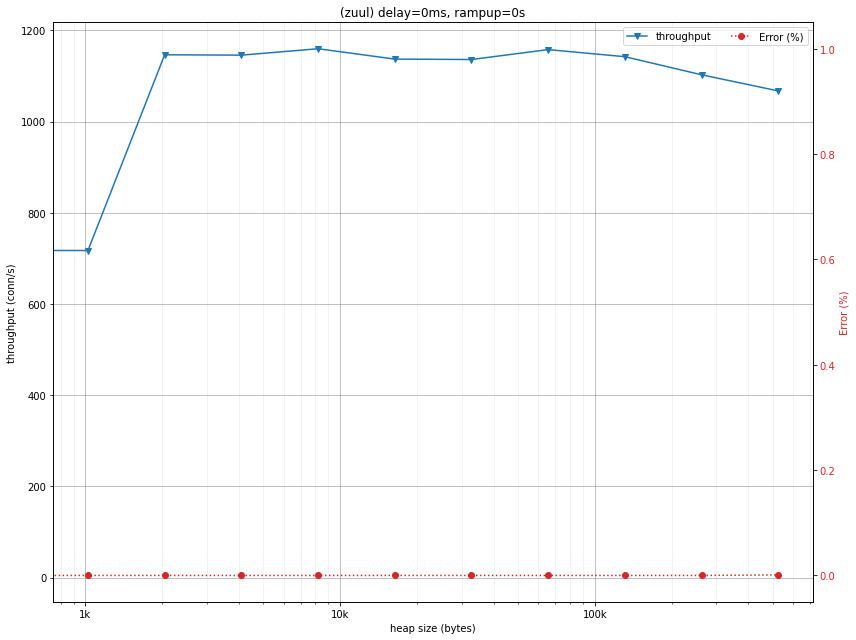

In [49]:
data = prepare_data(df_zuul,
                    filter=[
                            {'name': 'delay', 'value' : 0},
                            {'name': 'rampup', 'value' : 0}
                    ],
                    x_axis={'name': 'size', 'scale': 'log', 'label' : 'heap size (bytes)'},
                    y_axis={'label': 'throughput (conn/s)',
                            'scale': 'linear',
                            'plots': [
                              {'name': 'throughput', 'label': 'throughput', 'marker': 'v', 'linestyle': 'solid',},
                            ]
                    },
                    y2_axis={'label': 'Error (%)',
                            'scale': 'linear',
                            'plots': [
                              {'name': 'Err %', 'label': 'Error (%)', 'marker': 'o', 'linestyle': 'dotted',},
                            ]
                    },
                    tick_labels=['0', '1', '1k', '10k', '100k', '1M'],
                    x_minor_ticks=np.arange(0, 2*524288+2*1024, 1024),
                    x_major_ticks=np.arange(0, 2*524288+2*1024, 1024),

                    )
# print(data)
plot_graph(data,
          figsize=(12,9),
          suptitle='', title='(zuul) delay=0ms, rampup=0s',
          save_file= f"{gdrive}/zuul_delay0_rampup0-thr_x_size.svg",
          save_format='svg'
)


/content/gdrive/My Drive/Colab Notebooks/myservice_delay0_rampup0-thr_x_size.svg
svg


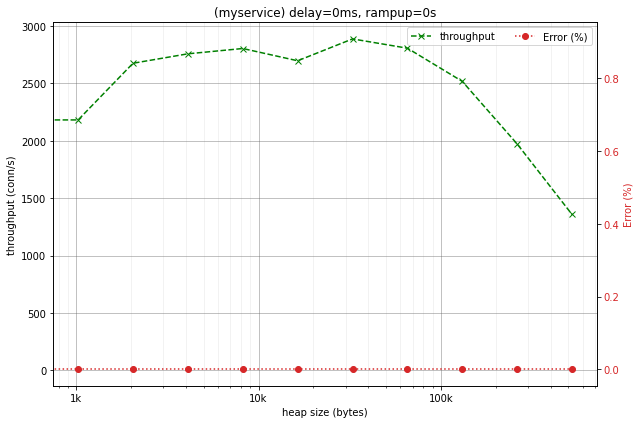

In [10]:
data = prepare_data(df_myservice,
                    filter=[
                            {'name': 'delay', 'value' : 0},
                            {'name': 'rampup', 'value' : 0}
                    ],
                    x_axis={'name': 'size', 'scale': 'log', 'label' : 'heap size (bytes)'},
                    y_axis={'label': 'throughput (conn/s)',
                            'scale': 'linear',
                            'plots': [
                              {'name': 'throughput', 'label': 'throughput', 'marker': 'x', 'linestyle': 'dashed', 'color': 'green'},
                            ]
                    },
                    y2_axis={'label': 'Error (%)',
                            'scale': 'linear',
                            'plots': [
                              {'name': 'Err %', 'label': 'Error (%)', 'marker': 'o', 'linestyle': 'dotted'},                
                            ]
                    },
                    tick_labels=['0', '1', '1k', '10k', '100k', '1M'],
                    x_minor_ticks=np.arange(0, 2*524288+2*1024, 1024),
                    x_major_ticks=np.arange(0, 2*524288+2*1024, 1024),

                    )

plot_graph(data, 
          suptitle='', title='(myservice) delay=0ms, rampup=0s',
          save_file= f"{gdrive}/myservice_delay0_rampup0-thr_x_size.svg",
          save_format='svg'
)



/content/gdrive/My Drive/Colab Notebooks/zuul_size0_rampup0-thr_x_delay.svg
svg


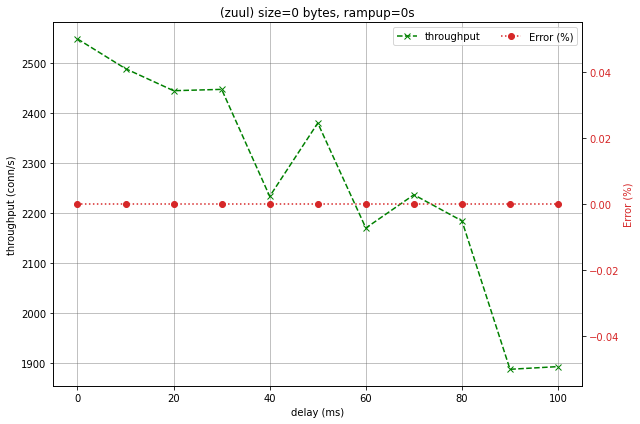

In [11]:
data = prepare_data(df_myservice,
                    filter=[
                            {'name': 'myservice1', 'value' : 3072},
                            {'name': 'size', 'value' : 0},
                            {'name': 'rampup', 'value' : 0}
                    ],
                    x_axis={'name': 'delay', 'scale': 'linear', 'label' : 'delay (ms)'},
                    # y_axis={'name': 'throughput', 'scale': 'linear', 'label': 'throughput connections/s', 'marker': 'x', 'linestyle': 'dashed'},
                    # y2_axis={'name': 'Err %', 'scale' : 'linear', 'label': 'Error (%)', 'marker': 'o', 'linestyle': 'dotted'}
                    y_axis={'label': 'throughput (conn/s)',
                            'scale': 'linear',
                            'plots': [
                              {'name': 'throughput', 'label': 'throughput', 'marker': 'x', 'linestyle': 'dashed', 'color': 'green'},
                            ]
                    },
                    y2_axis={'label': 'Error (%)',
                            'scale': 'linear',
                            'plots': [
                              {'name': 'Err %', 'label': 'Error (%)', 'marker': 'o', 'linestyle': 'dotted'},                
                            ]
                    },
                    )

plot_graph(data, 
          suptitle='', title='(zuul) size=0 bytes, rampup=0s',
          save_file= f"{gdrive}/zuul_size0_rampup0-thr_x_delay.svg",
          save_format='svg'
)


/content/gdrive/My Drive/Colab Notebooks/myservice1_size0_rampup0-ERR_x_RAM.svg
svg


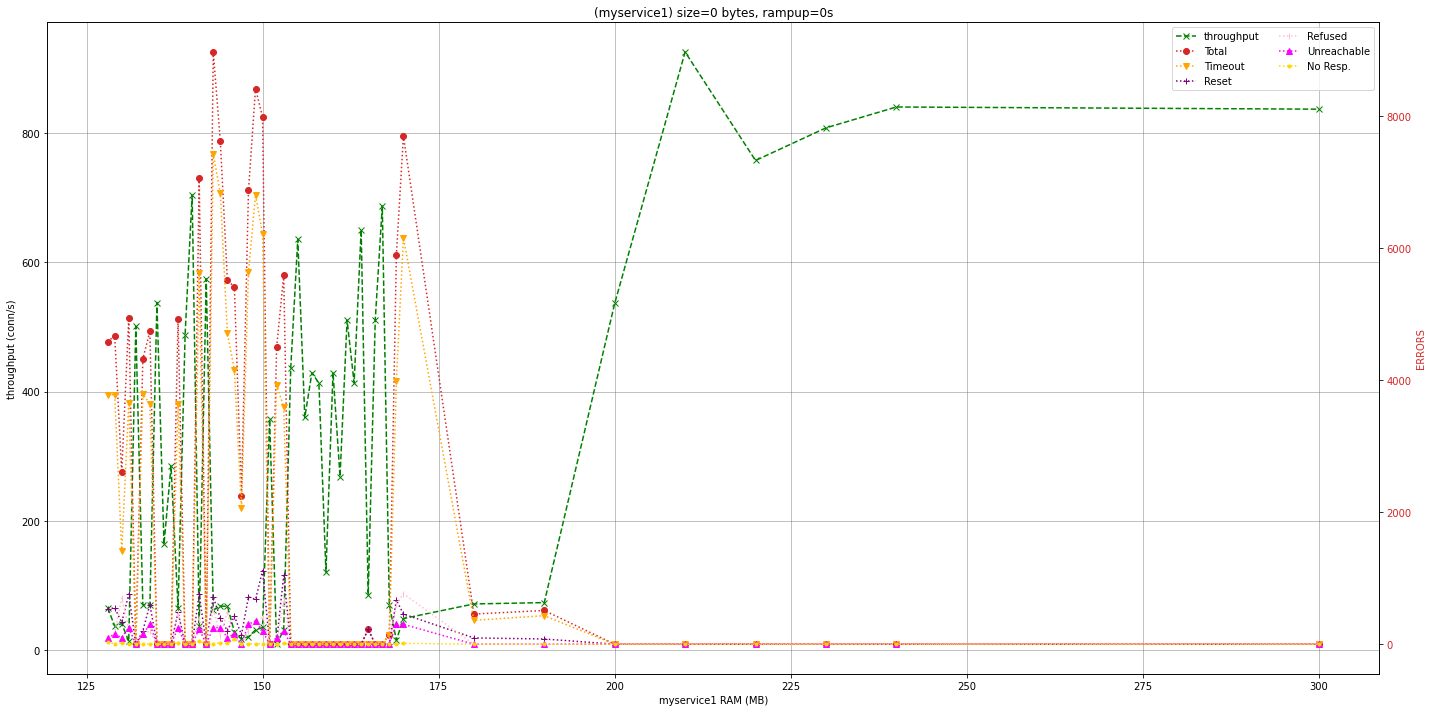

In [12]:
data = prepare_data(df_myservice,
                    filter=[
                            {'name': 'myservice1', 'value': 400, 'op': '<='},
                            {'name': 'teste', 'value' : 1},
                            {'name': 'size', 'value' : 0},
                            {'name': 'rampup', 'value' : 0}
                    ],
                    x_axis={'name': 'myservice1', 'scale': 'linear', 'label' : 'myservice1 RAM (MB)'},
                    # y_axis={'name': 'throughput', 'scale': 'linear', 'label': 'throughput (conn./s)', 'marker': '^',
                    #         'linestyle': 'solid', 'color': 'green'},
                    # y2_axis={'name': 'ERR', 'scale' : 'linear', 'label': 'ERR', 'marker': 'o', 'linestyle': 'dotted'}
                    y_axis={'label': 'throughput (conn/s)',
                            'scale': 'linear',
                            'plots': [
                              {'name': 'throughput', 'label': 'throughput', 'marker': 'x', 'linestyle': 'dashed', 'color': 'green'},
                            ]
                    },
                    y2_axis={'label': 'ERRORS',
                            'scale': 'linear',
                            'plots': [
                              {'name': 'ERR', 'label': 'Total', 'marker': 'o', 'linestyle': 'dotted'},
                              {'name': 'timeout', 'label': 'Timeout', 'marker': 'v', 'linestyle': 'dotted', 'color':'orange'},
                              {'name': 'conn. Reset', 'label': 'Reset', 'marker': '+', 'linestyle': 'dotted', 'color':'purple'},
                              {'name': 'conn. Refused', 'label': 'Refused', 'marker': '|', 'linestyle': 'dotted', 'color':'pink'},
                              {'name': 'host unreachable', 'label': 'Unreachable', 'marker': '^', 'linestyle': 'dotted', 'color':'magenta'},
                              {'name': 'no HTTP response', 'label': 'No Resp.', 'marker': '.', 'linestyle': 'dotted', 'color':'gold'},
                            ]
                    },
                    )

plot_graph(data, 
          figsize=(20,10),
          suptitle='', title='(myservice1) size=0 bytes, rampup=0s',
          save_file= f"{gdrive}/myservice1_size0_rampup0-ERR_x_RAM.svg",
          save_format='svg'
)

/content/gdrive/My Drive/Colab Notebooks/zuul_size0_rampup0-ERR_x_myserviceRAM.svg
svg


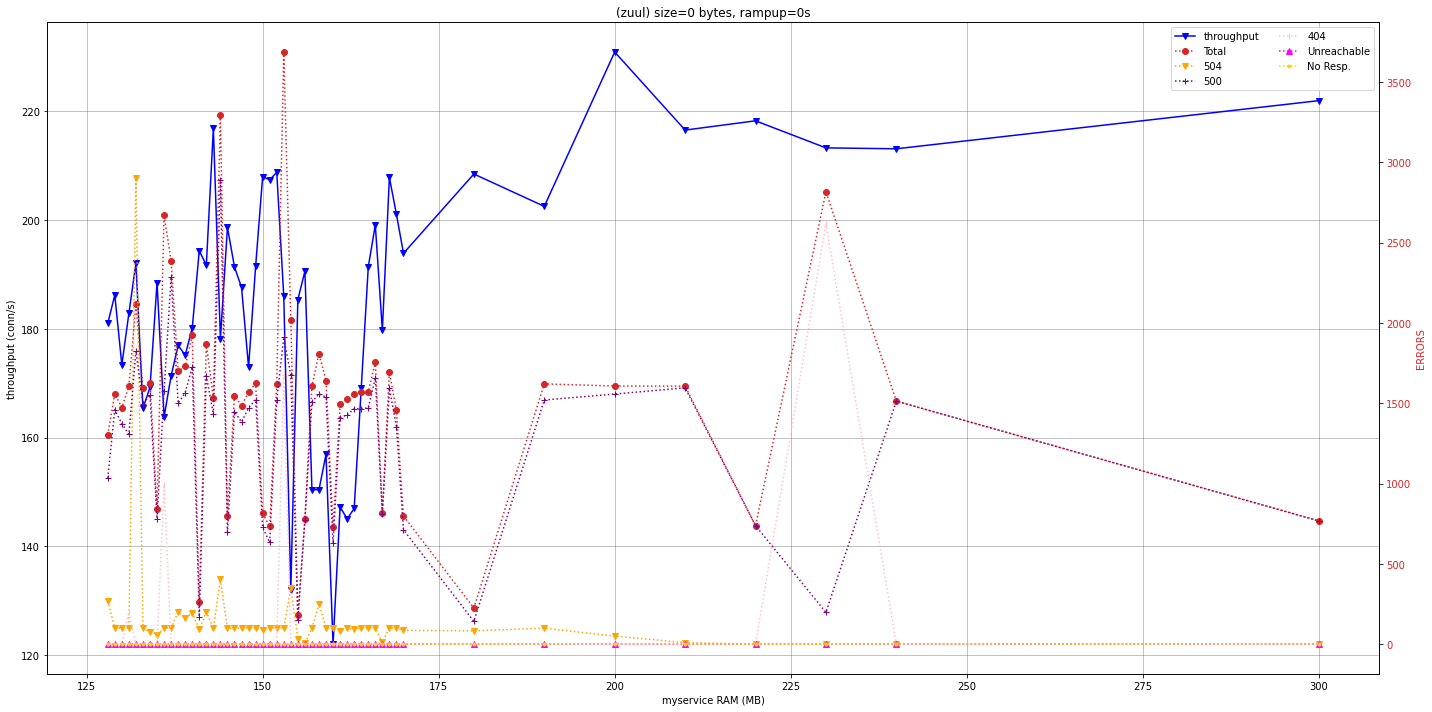

In [13]:
data = prepare_data(df_zuul,
                    filter=[
                            {'name': 'myservice1', 'value': 400, 'op': '<='},
                            {'name': 'teste', 'value' : 1},
                            {'name': 'size', 'value' : 0},
                            {'name': 'rampup', 'value' : 0}
                    ],
                    x_axis={'name': 'myservice1', 'scale': 'linear', 'label' : 'myservice RAM (MB)'},
                    # y_axis={'name': 'throughput', 'scale': 'linear', 'label': 'throughput (conn./s)', 'marker': '^',
                    #         'linestyle': 'solid', 'color': 'green'},
                    # y2_axis={'name': 'ERR', 'scale' : 'linear', 'label': 'ERR', 'marker': 'o', 'linestyle': 'dotted'}
                    y_axis={'label': 'throughput (conn/s)',
                            'scale': 'linear',
                            'plots': [
                              {'name': 'throughput', 'label': 'throughput', 'marker': 'v', 'linestyle': 'solid', 'color': 'blue'},
                            ]
                    },
                    y2_axis={'label': 'ERRORS',
                            'scale': 'linear',
                            'plots': [
                              {'name': 'Err', 'label': 'Total', 'marker': 'o', 'linestyle': 'dotted'},
                              {'name': '504', 'label': '504', 'marker': 'v', 'linestyle': 'dotted', 'color':'orange'},
                              {'name': '500', 'label': '500', 'marker': '+', 'linestyle': 'dotted', 'color':'purple'},
                              {'name': '404', 'label': '404', 'marker': '|', 'linestyle': 'dotted', 'color':'pink'},
                              {'name': 'host unreachable', 'label': 'Unreachable', 'marker': '^', 'linestyle': 'dotted', 'color':'magenta'},
                              {'name': 'no HTTP response', 'label': 'No Resp.', 'marker': '.', 'linestyle': 'dotted', 'color':'gold'},
                            ]
                    },
                    )

plot_graph(data, 
          figsize=(20,10),
          suptitle='', title='(zuul) size=0 bytes, rampup=0s',
          save_file= f"{gdrive}/zuul_size0_rampup0-ERR_x_myserviceRAM.svg",
          save_format='svg'
)

/content/gdrive/My Drive/Colab Notebooks/zuul_size0_rampup0-ERR_x_myzuulRAM.svg
svg


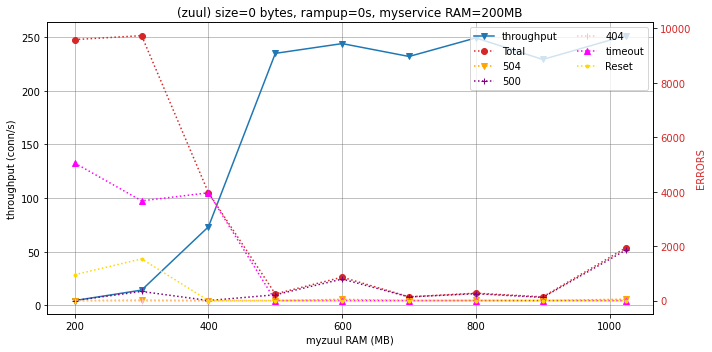

In [14]:
data = prepare_data(df_zuul,
                    filter=[
                            {'name': 'myservice1', 'value': 200, 'op': '=='},
                            {'name': 'teste', 'value' : 2},
                            {'name': 'size', 'value' : 0},
                            {'name': 'rampup', 'value' : 0}
                    ],
                    x_axis={'name': 'myzuul', 'scale': 'linear', 'label' : 'myzuul RAM (MB)'},
                    # y_axis={'name': 'throughput', 'scale': 'linear', 'label': 'throughput (conn./s)', 'marker': '^',
                    #         'linestyle': 'solid', 'color': 'green'},
                    # y2_axis={'name': 'ERR', 'scale' : 'linear', 'label': 'ERR', 'marker': 'o', 'linestyle': 'dotted'}
                    y_axis={'label': 'throughput (conn/s)',
                            'scale': 'linear',
                            'plots': [
                              {'name': 'throughput', 'label': 'throughput', 'marker': 'v', 'linestyle': 'solid', 'color': 'tab:blue'},
                            ]
                    },
                    y2_axis={'label': 'ERRORS',
                            'scale': 'linear',
                            'plots': [
                              {'name': 'Err', 'label': 'Total', 'marker': 'o', 'linestyle': 'dotted'},
                              {'name': '504', 'label': '504', 'marker': 'v', 'linestyle': 'dotted', 'color':'orange'},
                              {'name': '500', 'label': '500', 'marker': '+', 'linestyle': 'dotted', 'color':'purple'},
                              {'name': '404', 'label': '404', 'marker': '|', 'linestyle': 'dotted', 'color':'pink'},
                              {'name': 'Conn. Timeout', 'label': 'timeout', 'marker': '^', 'linestyle': 'dotted', 'color':'magenta'},
                              {'name': 'conn. Reset', 'label': 'Reset', 'marker': '.', 'linestyle': 'dotted', 'color':'gold'},
                            ]
                    },
                    )

plot_graph(data, 
          figsize=(10,5),
          suptitle='', title='(zuul) size=0 bytes, rampup=0s, myservice RAM=200MB',
          save_file= f"{gdrive}/zuul_size0_rampup0-ERR_x_myzuulRAM.svg",
          save_format='svg'
)

/content/gdrive/My Drive/Colab Notebooks/zuul_size0_rampup0-thr_x_delay.svg
svg


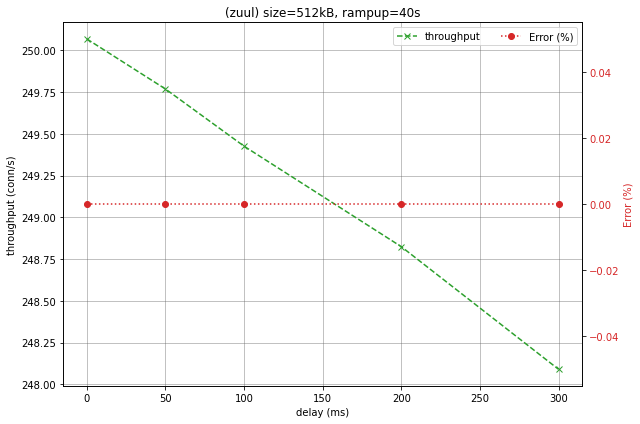

In [15]:
data = prepare_data(df_myservice,
                    filter=[
                            {'name': 'size', 'value' : 524288},
                            {'name': 'rampup', 'value' : 40}
                    ],
                    x_axis={'name': 'delay', 'scale': 'linear', 'label' : 'delay (ms)'},
                    # y_axis={'name': 'throughput', 'scale': 'linear', 'label': 'throughput connections/s', 'marker': 'x', 'linestyle': 'dashed'},
                    # y2_axis={'name': 'Err %', 'scale' : 'linear', 'label': 'Error (%)', 'marker': 'o', 'linestyle': 'dotted'}
                    y_axis={'label': 'throughput (conn/s)',
                            'scale': 'linear',
                            'plots': [
                              {'name': 'throughput', 'label': 'throughput', 'marker': 'x', 'linestyle': 'dashed', 'color': 'tab:green'},
                            ]
                    },
                    y2_axis={'label': 'Error (%)',
                            'scale': 'linear',
                            'plots': [
                              {'name': 'Err %', 'label': 'Error (%)', 'marker': 'o', 'linestyle': 'dotted'},
                              # {'name': '504', 'label': '504', 'marker': 'v', 'linestyle': 'dotted', 'color':'orange'},
                              # {'name': '500', 'label': '500', 'marker': '+', 'linestyle': 'dotted', 'color':'purple'},
                              # {'name': '404', 'label': '404', 'marker': '|', 'linestyle': 'dotted', 'color':'pink'},
                              # {'name': 'Conn. Timeout', 'label': 'timeout', 'marker': '^', 'linestyle': 'dotted', 'color':'magenta'},
                              # {'name': 'conn. Reset', 'label': 'Reset', 'marker': '.', 'linestyle': 'dotted', 'color':'gold'},
                            ]
                    },
                     )

plot_graph(data, 
          suptitle='', title='(zuul) size=512kB, rampup=40s',
          save_file= f"{gdrive}/zuul_size0_rampup0-thr_x_delay.svg",
          save_format='svg'
)


/content/gdrive/My Drive/Colab Notebooks/zuul_size1024_delay0-thr_x_rampup.svg
svg


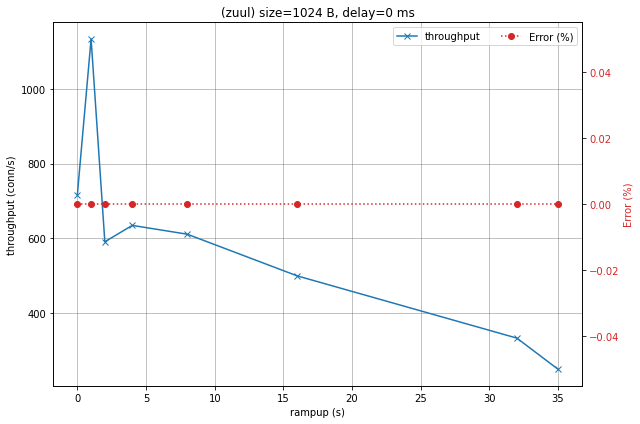

In [16]:
data = prepare_data(df_zuul,
                    filter=[
                            {'name': 'size', 'value' : 1024},
                            {'name': 'delay', 'value' : 0}
                    ],
                    x_axis={'name': 'rampup', 'scale': 'linear', 'label' : 'rampup (s)'},
                    # y_axis={'name': 'throughput', 'scale': 'linear', 'label': 'throughput connections/s', 'marker': 'x', 'linestyle': 'solid'},
                    # y2_axis={'name': 'Err %', 'scale' : 'linear', 'label': 'Error (%)', 'marker': 'o', 'linestyle': 'dotted'}
                    y_axis={'label': 'throughput (conn/s)',
                            'scale': 'linear',
                            'plots': [
                              {'name': 'throughput', 'label': 'throughput', 'marker': 'x', 'linestyle': 'solid', 'color': 'tab:blue'},
                            ]
                    },
                    y2_axis={'label': 'Error (%)',
                            'scale': 'linear',
                            'plots': [
                              {'name': 'Err %', 'label': 'Error (%)', 'marker': 'o', 'linestyle': 'dotted'},
                              # {'name': '504', 'label': '504', 'marker': 'v', 'linestyle': 'dotted', 'color':'orange'},
                              # {'name': '500', 'label': '500', 'marker': '+', 'linestyle': 'dotted', 'color':'purple'},
                              # {'name': '404', 'label': '404', 'marker': '|', 'linestyle': 'dotted', 'color':'pink'},
                              # {'name': 'Conn. Timeout', 'label': 'timeout', 'marker': '^', 'linestyle': 'dotted', 'color':'magenta'},
                              # {'name': 'conn. Reset', 'label': 'Reset', 'marker': '.', 'linestyle': 'dotted', 'color':'gold'},
                            ]
                    },
                    )

plot_graph(data, 
          suptitle='', title='(zuul) size=1024 B, delay=0 ms',
          save_file= f"{gdrive}/zuul_size1024_delay0-thr_x_rampup.svg",
          save_format='svg'
)


/content/gdrive/My Drive/Colab Notebooks/myservice_size0_rampup0-thr_x_delay.svg
svg


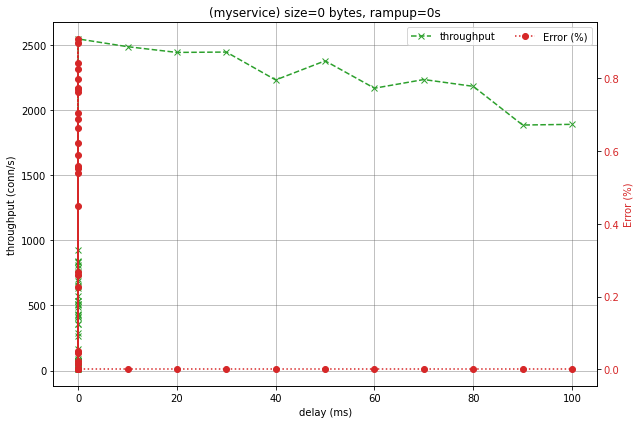

In [64]:
data = prepare_data(df_myservice,
                    filter=[
                            {'name': 'size', 'value' : 0},
                            {'name': 'rampup', 'value' : 0}
                    ],
                    x_axis={'name': 'delay', 'scale': 'linear', 'label' : 'delay (ms)'},
                    # y_axis={'name': 'throughput', 'scale': 'linear', 'label': 'throughput connections/s', 'marker': 'x', 'linestyle': 'solid'},
                    # y2_axis={'name': 'Err %', 'scale' : 'linear', 'label': 'Error (%)', 'marker': 'o', 'linestyle': 'dotted'}
                    y_axis={'label': 'throughput (conn/s)',
                            'scale': 'linear',
                            'plots': [
                              {'name': 'throughput', 'label': 'throughput', 'marker': 'x', 'linestyle': 'dashed', 'color': 'tab:green'},
                            ]
                    },
                    y2_axis={'label': 'Error (%)',
                            'scale': 'linear',
                            'plots': [
                              {'name': 'Err %', 'label': 'Error (%)', 'marker': 'o', 'linestyle': 'dotted'},
                              # {'name': '504', 'label': '504', 'marker': 'v', 'linestyle': 'dotted', 'color':'orange'},
                              # {'name': '500', 'label': '500', 'marker': '+', 'linestyle': 'dotted', 'color':'purple'},
                              # {'name': '404', 'label': '404', 'marker': '|', 'linestyle': 'dotted', 'color':'pink'},
                              # {'name': 'Conn. Timeout', 'label': 'timeout', 'marker': '^', 'linestyle': 'dotted', 'color':'magenta'},
                              # {'name': 'conn. Reset', 'label': 'Reset', 'marker': '.', 'linestyle': 'dotted', 'color':'gold'},
                            ]
                    },
                    )

plot_graph(data, 
          suptitle='', title='(myservice) size=0 bytes, rampup=0s',
          save_file= f"{gdrive}/myservice_size0_rampup0-thr_x_delay.svg",
          save_format='svg'
)


/content/gdrive/My Drive/Colab Notebooks/zuul_thr_x_size.svg
svg


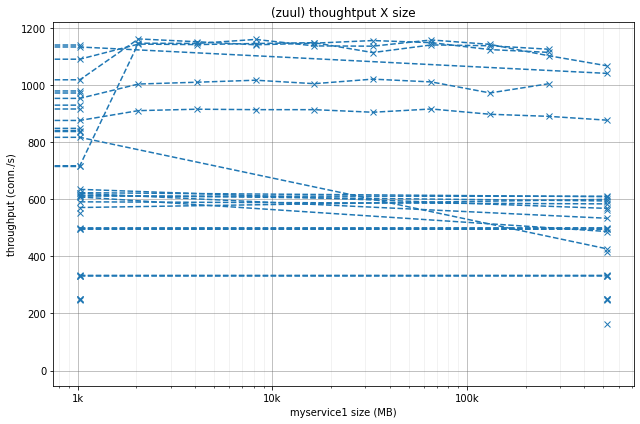

In [56]:
df_zuul = df_zuul[df_zuul['delay'].notna()]
df = df_zuul
rampups=list(set(df['rampup'].to_list()))
rampups.sort()
# rampups = [0]
delays=list(set(df['delay'].to_list()))
delays.sort()

series = []
for rp in rampups:
  for dl in delays:
    serie = {'name': 'throughput', 'label': 'rampup={} delay={}'.format(str(int(rp)), str(int(dl))), 'marker': 'x', 'linestyle': 'dashed',
             'filter':[
                            {'name': 'delay', 'value' : dl},
                            {'name': 'rampup', 'value' : rp}
             ],
            }
    series.append(serie)

data = prepare_data(df_zuul,
                    x_axis={'name': 'size', 'scale': 'log', 'label' : 'myservice1 size (MB)'},
                    y_axis={'label': 'throughput (conn./s)',
                            'scale': 'linear',
                            'plots': series
                    },
                    tick_labels=['0', '1', '1k', '10k', '100k', '1M', '10M'],
                    x_minor_ticks=np.arange(0, 2*524288+2*1024, 1024),
                    x_major_ticks=np.arange(0, 2*524288+2*1024, 1024),
                    legend=False,
                    )

plot_graph(data, 
           suptitle='', title='(zuul) thoughtput X size',
           save_file= f"{gdrive}/zuul_thr_x_size.svg",
           save_format='svg'
)

/content/gdrive/My Drive/Colab Notebooks/myservice_throughput_x_size.svg
svg


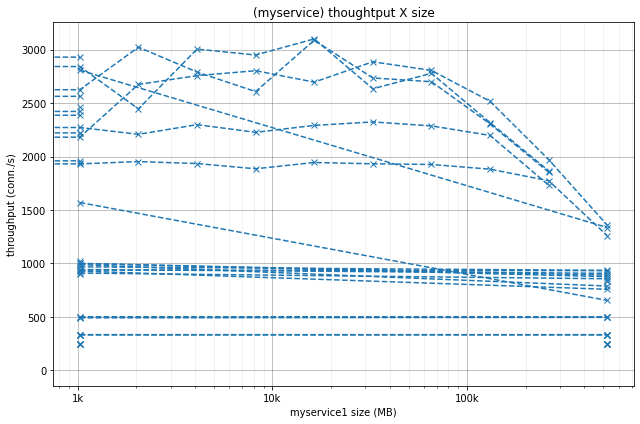

In [58]:
df_myservice = df_myservice[df_myservice['delay'].notna()]
df = df_myservice
rampups=list(set(df['rampup'].to_list()))
rampups.sort()
# rampups = [0]
delays=list(set(df['delay'].to_list()))
delays.sort()

series = []
for rp in rampups:
  for dl in delays:
    serie = {'name': 'throughput', 'label': 'rampup={} delay={}'.format(str(int(rp)), str(int(dl))), 'marker': 'x', 'linestyle': 'dashed',
             'filter':[
                            {'name': 'delay', 'value' : dl},
                            {'name': 'rampup', 'value' : rp}
             ],
            }
    series.append(serie)

data = prepare_data(df_myservice,
                    x_axis={'name': 'size', 'scale': 'log', 'label' : 'myservice1 size (MB)'},
                    y_axis={'label': 'throughput (conn./s)',
                            'scale': 'linear',
                            'plots': series
                    },
                    tick_labels=['0', '1', '1k', '10k', '100k', '1M', '10M'],
                    x_minor_ticks=np.arange(0, 2*524288+2*1024, 1024),
                    x_major_ticks=np.arange(0, 2*524288+2*1024, 1024),
                    legend=False,
                    )
plot_graph(data, 
           suptitle='', title='(myservice) thoughtput X size',
           save_file= f"{gdrive}/myservice_throughput_x_size.svg",
           save_format='svg'
)

/content/gdrive/My Drive/Colab Notebooks/zuul_trhoughput_x_delay.svg
svg


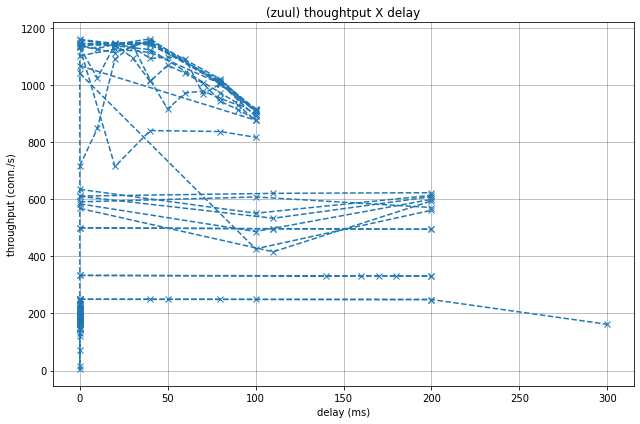

In [61]:
df_zuul = df_zuul[df_zuul['delay'].notna()]
df = df_zuul
rampups=list(set(df['rampup'].to_list()))
rampups.sort()
# rampups = [0]
sizes=list(set(df['size'].to_list()))
sizes.sort()

series = []
for rp in rampups:
  for sz in sizes:
    serie = {'name': 'throughput', 'label': 'rampup={} size={}'.format(str(int(rp)), str(int(sz))), 'marker': 'x', 'linestyle': 'dashed',
             'filter':[
                            {'name': 'size', 'value' : sz},
                            {'name': 'rampup', 'value' : rp}
             ],
            }
    series.append(serie)

data = prepare_data(df_zuul,
                    x_axis={'name': 'delay', 'scale': 'linear', 'label' : 'delay (ms)'},
                    y_axis={'label': 'throughput (conn./s)',
                            'scale': 'linear',
                            'plots': series
                    },
                    legend=False,
                    )


plot_graph(data, 
           suptitle='', title='(zuul) thoughtput X delay',
           save_file= f"{gdrive}/zuul_trhoughput_x_delay.svg",
           save_format='svg'
)

/content/gdrive/My Drive/Colab Notebooks/zuul_rampup0-thr_x_delay.svg
svg


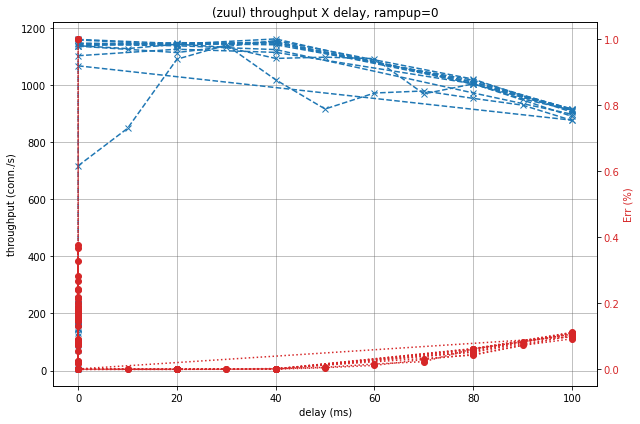

/content/gdrive/My Drive/Colab Notebooks/zuul_rampup1-thr_x_delay.svg
svg


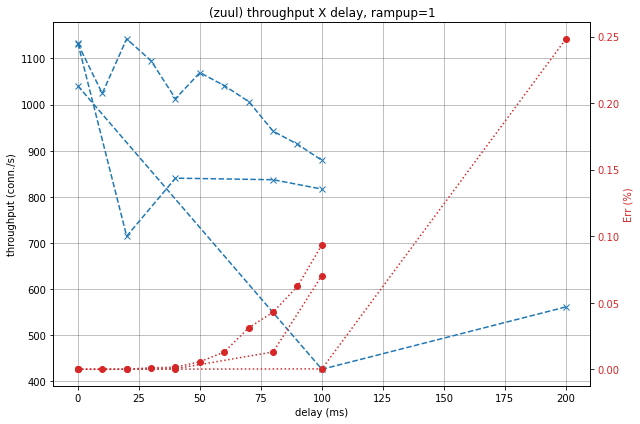

/content/gdrive/My Drive/Colab Notebooks/zuul_rampup2-thr_x_delay.svg
svg


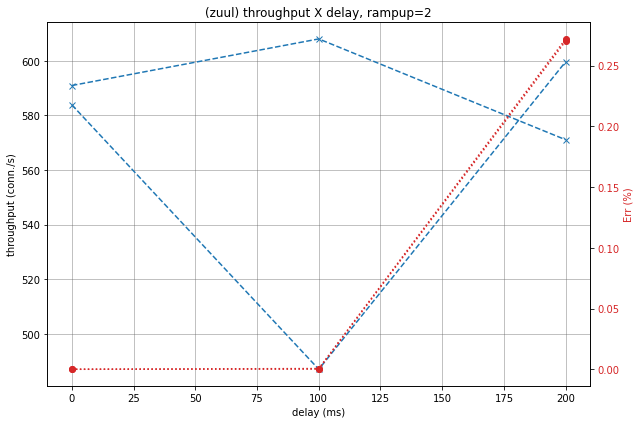

/content/gdrive/My Drive/Colab Notebooks/zuul_rampup4-thr_x_delay.svg
svg


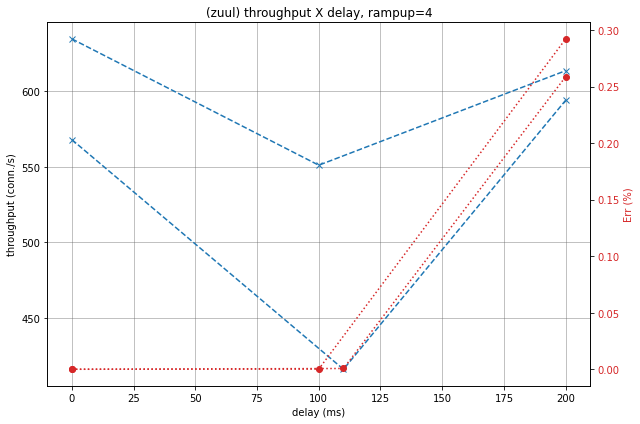

/content/gdrive/My Drive/Colab Notebooks/zuul_rampup8-thr_x_delay.svg
svg


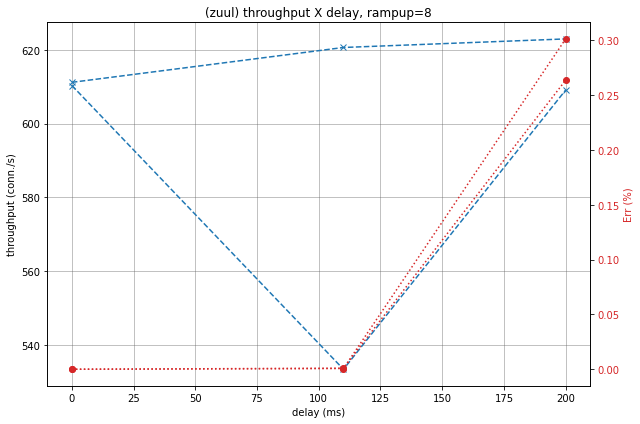

/content/gdrive/My Drive/Colab Notebooks/zuul_rampup16-thr_x_delay.svg
svg


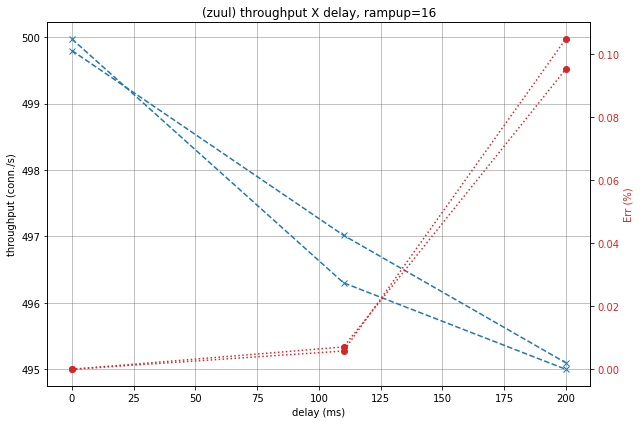

/content/gdrive/My Drive/Colab Notebooks/zuul_rampup32-thr_x_delay.svg
svg


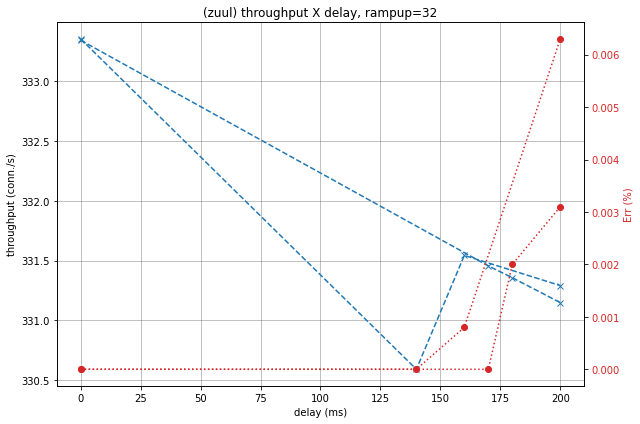

/content/gdrive/My Drive/Colab Notebooks/zuul_rampup35-thr_x_delay.svg
svg


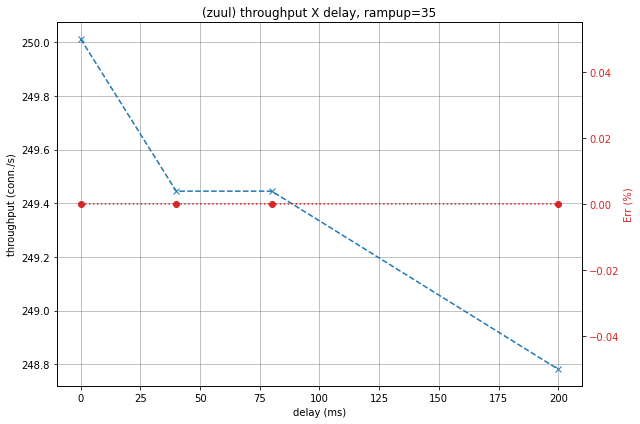

/content/gdrive/My Drive/Colab Notebooks/zuul_rampup40-thr_x_delay.svg
svg


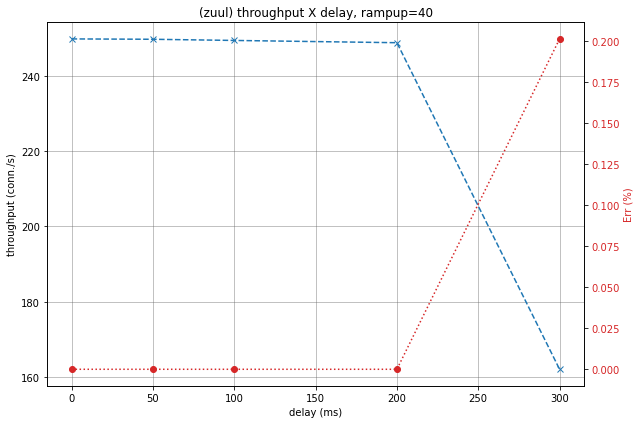

In [65]:
df_zuul = df_zuul[df_zuul['delay'].notna()]
df = df_zuul
rampups=list(set(df['rampup'].to_list()))
rampups.sort()
# rampups = [0]
sizes=list(set(df['size'].to_list()))
sizes.sort()

for rp in rampups:
  series = []
  series2 = []
  for sz in sizes:
    aux = df.query('rampup=={} and size=={}'.format(str(rp), str(sz)))
    y = aux['throughput'].to_list()
    y = np.array(y).astype(np.double)
    mask = np.isfinite(y)
    if len(mask) > 0:
      serie = {'name': 'throughput', 'label': 'size={}'.format(str(int(sz))), 'marker': 'x', 'linestyle': 'dashed',
              'filter':[
                              {'name': 'size', 'value' : sz},
                              {'name': 'rampup', 'value' : rp}
              ],
              }
      series.append(serie)
      serie2 = {'name': 'Err %', 'label': 'Err (%)'.format(str(int(sz))), 'marker': 'o', 'linestyle': 'dotted',
              'filter':[
                              {'name': 'size', 'value' : sz},
                              {'name': 'rampup', 'value' : rp}
              ],
              }
      series2.append(serie2)

  data = prepare_data(df_zuul,
                      x_axis={'name': 'delay', 'scale': 'linear', 'label' : 'delay (ms)'},
                      y_axis={'label': 'throughput (conn./s)', 'scale': 'linear', 'plots': series},
                      y2_axis={'label': 'Err (%)', 'scale' : 'linear', 'plots' : series2},
                      legend=False,
                      )
  plot_graph(data, 
            suptitle='', title='(zuul) throughput X delay, rampup={}'.format(str(int(rp))),
            save_file= f"{gdrive}/zuul_rampup{str(int(rp))}-thr_x_delay.svg",
            save_format='svg'
  )

/content/gdrive/My Drive/Colab Notebooks/myservice_rampup0-thr_x_delay.svg
svg


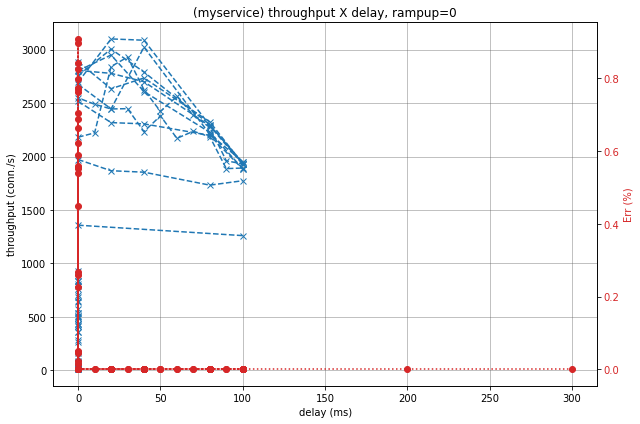

/content/gdrive/My Drive/Colab Notebooks/myservice_rampup1-thr_x_delay.svg
svg


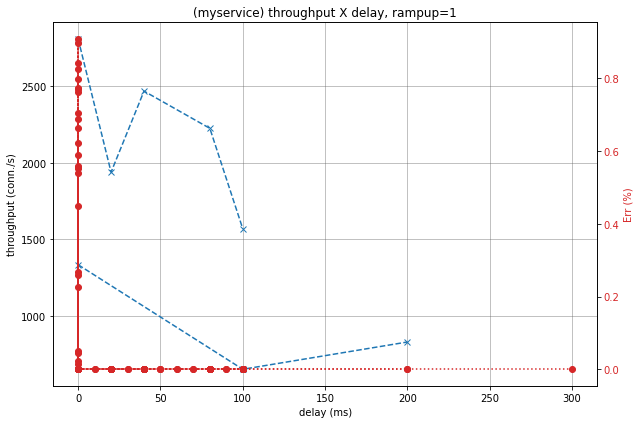

/content/gdrive/My Drive/Colab Notebooks/myservice_rampup2-thr_x_delay.svg
svg


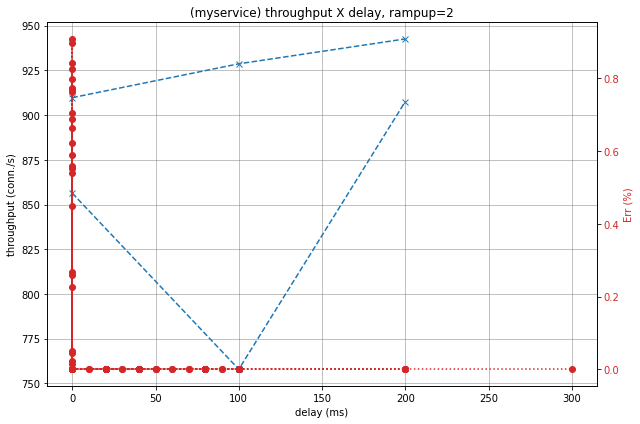

/content/gdrive/My Drive/Colab Notebooks/myservice_rampup4-thr_x_delay.svg
svg


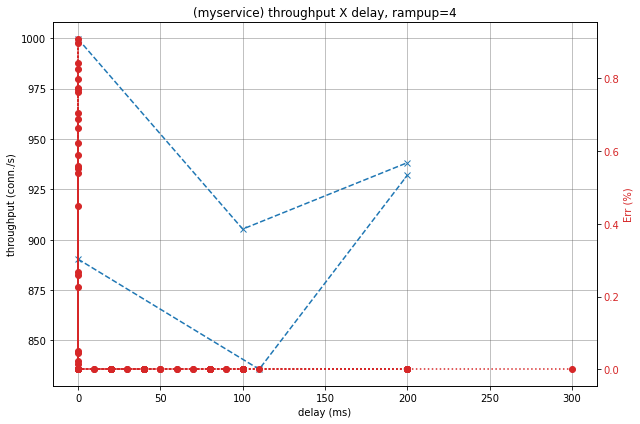

/content/gdrive/My Drive/Colab Notebooks/myservice_rampup8-thr_x_delay.svg
svg


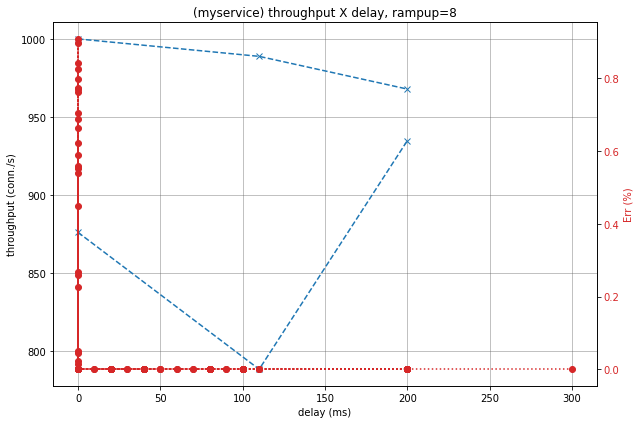

/content/gdrive/My Drive/Colab Notebooks/myservice_rampup16-thr_x_delay.svg
svg


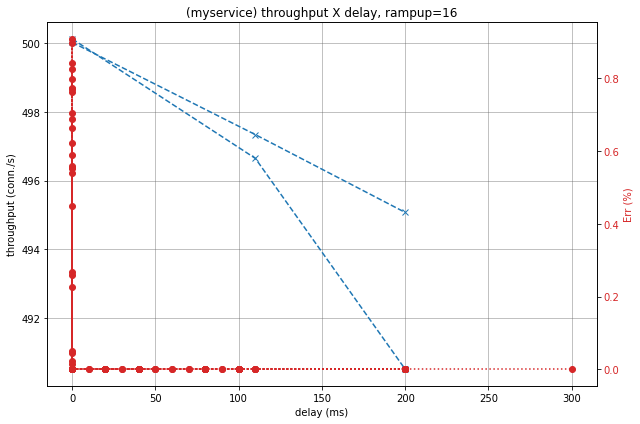

/content/gdrive/My Drive/Colab Notebooks/myservice_rampup32-thr_x_delay.svg
svg


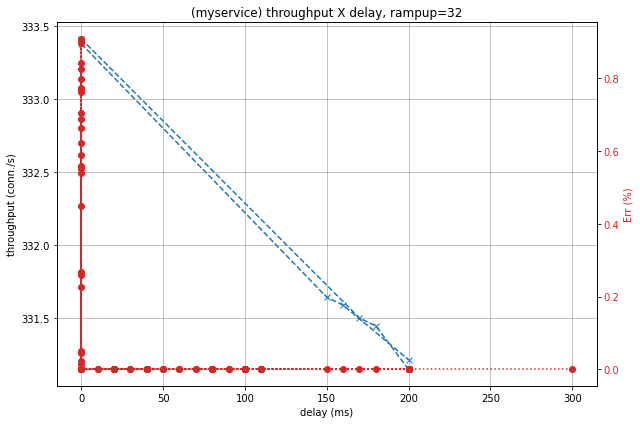

/content/gdrive/My Drive/Colab Notebooks/myservice_rampup35-thr_x_delay.svg
svg


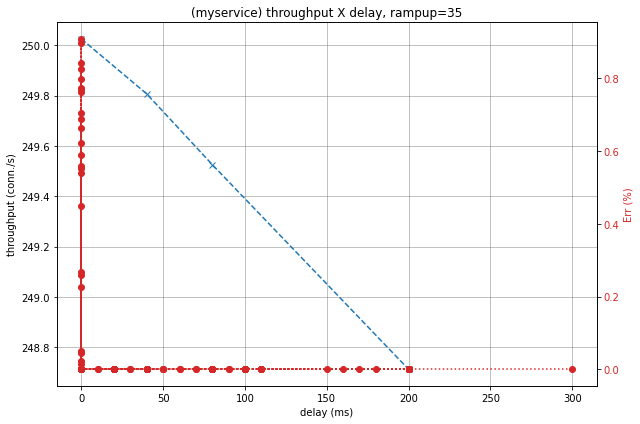

/content/gdrive/My Drive/Colab Notebooks/myservice_rampup40-thr_x_delay.svg
svg


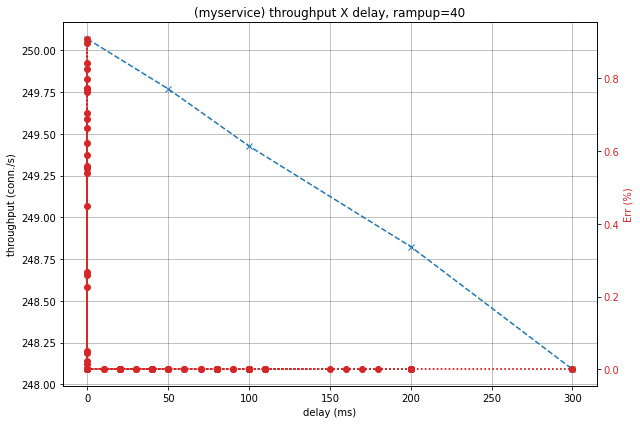

/content/gdrive/My Drive/Colab Notebooks/myservice_rampup1024-thr_x_delay.svg
svg


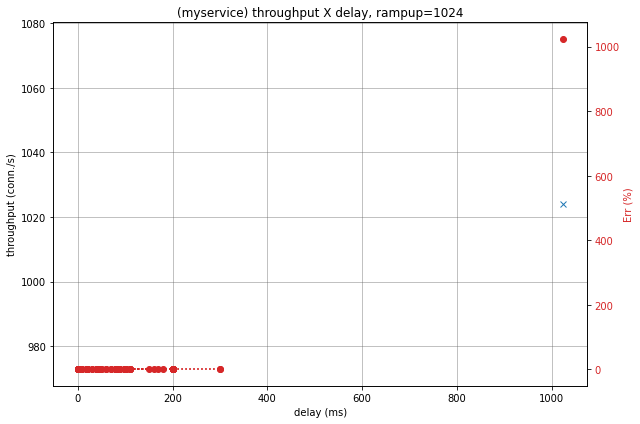

In [66]:
df_myservice = df_myservice[df_myservice['delay'].notna()]
df = df_myservice
rampups=list(set(df['rampup'].to_list()))
rampups.sort()
# rampups = [0]
sizes=list(set(df['size'].to_list()))
sizes.sort()

for rp in rampups:
  series = []
  for sz in sizes:
    aux = df.query('rampup=={} and size=={}'.format(str(rp), str(sz)))
    y = aux['throughput'].to_list()
    y = np.array(y).astype(np.double)
    mask = np.isfinite(y)
    if len(mask) > 0:
      serie = {'name': 'throughput', 'label': 'size={}'.format(str(int(sz))), 'marker': 'x', 'linestyle': 'dashed',
              'filter':[
                              {'name': 'size', 'value' : sz},
                              {'name': 'rampup', 'value' : rp}
              ],
              }
      series.append(serie)
      serie2 = {'name': 'Err %', 'label': 'Err (%)'.format(str(int(sz))), 'marker': 'o', 'linestyle': 'dotted',
              'filter':[
                              {'name': 'size', 'value' : sz},
                              {'name': 'rampup', 'value' : rp}
              ],
              }
      series2.append(serie2)

  data = prepare_data(df_myservice,
                      x_axis={'name': 'delay', 'scale': 'linear', 'label' : 'delay (ms)'},
                      y_axis={'label': 'throughput (conn./s)', 'scale': 'linear', 'plots': series},
                      y2_axis={'label': 'Err (%)', 'scale' : 'linear', 'plots' : series2},
                      legend=False,
                      )

  plot_graph(data, 
            suptitle='', title='(myservice) throughput X delay, rampup={}'.format(str(int(rp))),
            save_file= f"{gdrive}/myservice_rampup{str(int(rp))}-thr_x_delay.svg",
            save_format='svg'

  )